<center><h1 style="color:#0098E9;"> Capitulo 4. Solucion de ecuaciones no lineales</h1></center>
  
<center><h3 style="color:#0098E9;"> Manuel A. Sanchez</h3></center>
<center><h3 style="color:#0098E9;"> Pontificia Universidad Catolica de Chile</h3></center>
<hr style="border:2px solid gray"> </hr>

In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [28]:
%matplotlib widget

In [29]:
plt.rcParams['figure.figsize'] = (6,3.5)
plt.rcParams['figure.dpi'] = 150

# Metodo de biseccion


In [5]:
a = 0.0
b = 3.0
fun = lambda x: (x-0.5)*(x+3.5)

def biseccion(f, a, b, TOL =1e-12, MAXITER = 100):
    """
    Input : fun (function): La función no lineal f(x) a evaluar.
            a (float): Límite inferior del intervalo.
            b (float): Límite superior del intervalo.
            TOL (float, optional): Tolerancia (error máximo) para el criterio de parada.
            MAXITER (int, optional): Número máximo de iteraciones permitidas.

    Output: float: La raíz aproximada de la función.
    """
    
    # Validación inicial: Debe haber un cambio de signo (f(a) * f(b) < 0)
    if f(a) * f(b) >= 0:
        raise ValueError( "El método de bisección no se puede aplicar. Asegúrese de que f(a) y f(b) tengan signos opuestos.")

    # Inicialización
    i = 0
    intervals = []; clist = []; f_clist = []; 
    while (b - a) / 2 > TOL and i < MAXITER:
        c = (a + b) / 2
        f_c = f(c)
        # Save all for animation
        intervals.append([a,b]); clist.append(c); f_clist.append(f_c)
        if abs(f_c) < TOL:
            return c, i
        elif f(a) * f_c < 0:
            b = c
        else:
            a = c
        i += 1

    if i == MAXITER:
        raise Exception("Se excedió el número máximo de iteraciones permitidas.")
    return c, i, (intervals, clist, f_clist)


In [6]:
c, n, biseccion_solucion = biseccion(fun, a, b, TOL =1e-12, MAXITER = 100)
print(c,n)

0.49999999999954525 41


In [7]:
def biseccion_show():
    (intervals, clist, f_clist) = biseccion_solucion 
    n = len(clist)
    a = intervals[0][0]; b = intervals[0][1]
    fig, ax = plt.subplots()
    xplot = np.linspace(a,b,100)
    ax.plot(xplot, fun(xplot))
    for k in range(0,n):
        ak = intervals[k][0]; bk = intervals[k][1]
        plt.plot([ak,bk], [0,0],'-+', color='C07')
        ax.plot(clist[k], f_clist[k], 'o', color='C02')
        ax.plot(clist[k], 0, 'X', color='C03')
        ax.plot([clist[k],clist[k]], [0,f_clist[k]], ':', color='C07', linewidth=1)
        ax.set_xlim([ak-0.1,bk+0.1])
        ax.set_ylim([f_clist[k]-1, f_clist[k]+1])
        ax.set_title('$f(x)$ = {} $, x = $ {}'.format(f_clist[k],clist[k]) )
    pass

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.biseccion_show()>

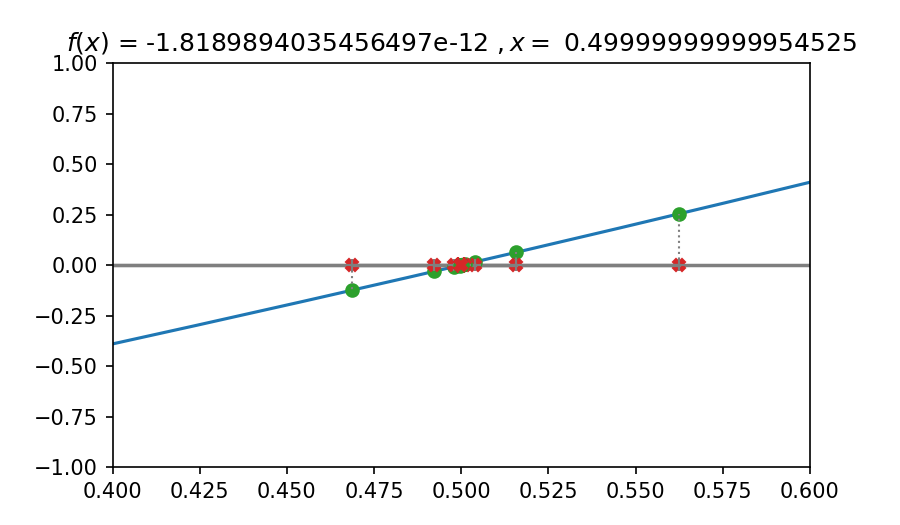

In [8]:
interact(biseccion_show, n=(0,2,1))

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact # Assuming you use this library

# --- ASSUME THESE ARE DEFINED IN YOUR NOTEBOOK ---
# fun = lambda x: x**3 - x - 1
# a = 1.0
# b = 2.0
# -------------------------------------------------

def biseccion_show(n_iteraciones):
    """
    Plots the Bisection Method process up to a specified number of iterations (n_iteraciones).
    """
    
    # 1. Initialize lists and set the initial interval
    ak = [a]; bk = [b]; xk = []
    
    # 2. Re-calculate the Bisection process up to the max_iter
    max_n = 20 # Max iterations for calculating the path
    
    for k in range(max_n):
        
        # Stop calculation if max_iteraciones is reached or if the root is found
        if k >= n_iteraciones: 
            break
            
        x = (ak[k] + bk[k]) / 2
        xk.append(x)
        
        if fun(ak[k]) * fun(x) < 0:
            bk.append(x)
            ak.append(ak[k])
        else:
            bk.append(bk[k])
            ak.append(x)
            
        if fun(x) == 0:
            break
            
    # --- PLOTTING ---
    
    # 3. Clear the existing plot
    plt.cla() # Clears the current axes, essential for interact to work correctly

    # 4. Define plot range based on the *current* interval
    a_current = ak[n_iteraciones] if n_iteraciones < len(ak) else ak[-1]
    b_current = bk[n_iteraciones] if n_iteraciones < len(bk) else bk[-1]
    
    xplot = np.linspace(a, b, 100)
    
    # 5. Redraw the function and x-axis
    plt.plot(xplot, fun(xplot), label='$f(x)$')
    plt.axhline(0, color='black', linewidth=0.5)

    # 6. Highlight the initial interval
    plt.plot([ak[0], bk[0]], [0, 0], '-+', color='gray', label='Intervalo Inicial')

    # 7. Plot elements up to the specified n_iteraciones
    if n_iteraciones > 0:
        
        # Plot the final approximation (c) and its function value
        x_final = (a_current + b_current) / 2
        f_x_final = fun(x_final)
        
        # Show all previous interval midpoints (xk)
        plt.plot(xk[:n_iteraciones], [0] * n_iteraciones, 'x', color='C2', 
                 markersize=6, label='Aproximaciones $x_k$')
        
        # Vertical line from x_final to f(x_final)
        plt.plot([x_final, x_final], [0, f_x_final], ':', color='C7', linewidth=1)
        
        # Current interval marker
        plt.plot([a_current, b_current], [0, 0], 'o-', color='red', markersize=5, 
                 label='Intervalo Actual')
        
        # Current root estimate
        plt.plot(x_final, 0, 'X', color='red', markersize=8, label='Raíz Actual')
        
        # Set View Limits
        plt.xlim([a - 0.1, b + 0.1])
        y_min = min(fun(xplot)) - 0.5
        y_max = max(fun(xplot)) + 0.5
        plt.ylim([y_min, y_max])
        
        # Set Title
        plt.title(f'Método de Bisección | Iteración: {n_iteraciones} | Raíz ≈ {x_final:.6f}')
        
    else:
        # Initial state title
        plt.title('Método de Bisección | Iteración: 0 (Inicio)')
        plt.xlim([a - 0.1, b + 0.1])
        y_min = min(fun(xplot)) - 0.5
        y_max = max(fun(xplot)) + 0.5
        plt.ylim([y_min, y_max])
        
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

# Run the interactive widget
# Note: Adjust the range (0, 20, 1) based on how many steps you need
interact(biseccion_show, n_iteraciones=(0, 5, 1))

interactive(children=(IntSlider(value=2, description='n_iteraciones', max=5), Output()), _dom_classes=('widget…

<function __main__.biseccion_show(n_iteraciones)>

# Metodo de regula falsi

interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.regula_falsi_show(n)>

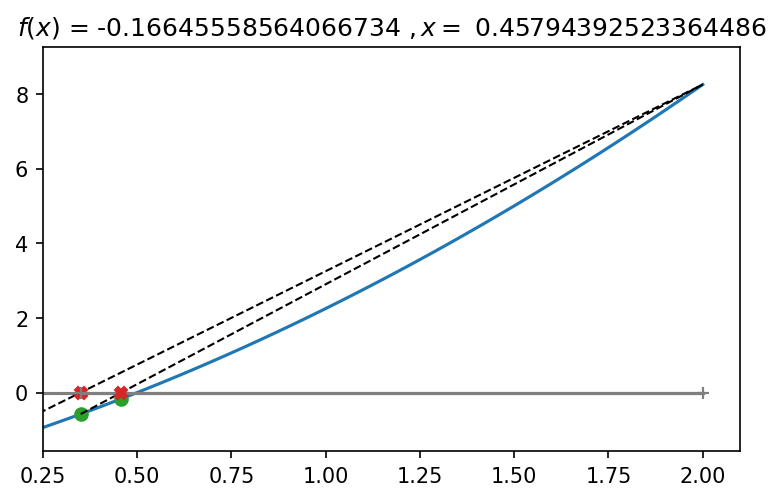

In [6]:
a = 0
b = 2
fun = lambda x: (x-0.5)*(x+3.5)

def regula_falsi_show(n):
    ak = []
    bk = []
    xk = []
    ak.append(a)
    bk.append(b)
    
    fig, ax = plt.subplots()
    xplot = np.linspace(a,b,100)
    ax.plot(xplot, fun(xplot))
    
    
    for k in range(0,n):
        plt.plot([ak[k],bk[k]], [0,0],'-+', color='C07')
        plt.plot([ak[k],bk[k]], [fun(ak[k]), fun(bk[k])], '--', color='k', linewidth=1)
        x = ak[k] - fun(ak[k])*(bk[k]-ak[k])/(fun(bk[k])-fun(ak[k]))
        xk.append(x)
        
        ax.plot(x, fun(x), 'o', color='C02')
        ax.plot(x, 0, 'X', color='C03')
        ax.set_xlim([ak[k]-0.1,bk[k]+0.1])
        ax.set_ylim([fun(ak[k])-1, fun(bk[k])+1])
        ax.set_title('$f(x)$ = {} $, x = $ {}'.format(fun(x),x) )
        if fun(x) == 0:
            break
        elif fun(ak[k])*fun(x) < 0:
            bk.append(x)
            ak.append(ak[k])
        else:
            bk.append(bk[k])
            ak.append(x)
        # end
        #if k>0:
            #ax.set_xlim([xk[k]-1*abs(xk[k-1]-xk[k]),xk[k]+1*abs(xk[k-1]-xk[k])])
            #ax.set_ylim([fun(xk[k]-0.5*abs(xk[k-1]-xk[k])), fun(xk[k]+0.5*abs(xk[k-1]-xk[k]))])
    # end for
    
interact(regula_falsi_show, n=(0,5,1))


# Metodo de Newton-Raphson

In [31]:
a = 0
b = 2
x0 = 1.5
fun = lambda x: (x-0.5)*(x+3.5)
dfun = lambda x: 2*x+3
def Newton_Raphson_show(n):
    xk = []
    xk.append(x0)
    
    fig, ax = plt.subplots()
    xplot = np.linspace(a,b,10000)
    ax.plot(xplot, fun(xplot))
    ax.plot([a,b], [0,0],'-+', color='C07')
    ax.plot(x0, fun(x0), 'o', color='C01')
    ax.plot(x0, 0, 'X', color='C01')
    ax.plot([x0,x0], [0,fun(x0)], ':', color='C07', linewidth=1)
    for k in range(0,n):
        T = lambda x: fun(xk[k]) + (x-xk[k])*dfun(xk[k])
        
        ax.plot([a,b], [T(a), T(b)], '--', color='k', linewidth=1)
        x = xk[k] - fun(xk[k])/(dfun(xk[k]))
        ax.plot(x, fun(x), 'o', color='C02')
        ax.plot(x, 0, 'X', color='C03')
        ax.plot([x,x], [0,fun(x)], ':', color='C07', linewidth=1)
        if k>0:
            ax.set_xlim([xk[k]-0.5*abs(xk[k-1]-xk[k]),xk[k]+0.5*abs(xk[k-1]-xk[k])])
            ax.set_ylim([fun(xk[k]-0.5*abs(xk[k-1]-xk[k])), fun(xk[k]+0.5*abs(xk[k-1]-xk[k]))])
        xk.append(x)
        ax.set_title('$f(x)$ = {} $, x = $ {}'.format(fun(x),x) )
       
    # end for
    
interact(Newton_Raphson_show, n=(0,5,1))


interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.Newton_Raphson_show(n)>

# Iteracion de punto fijo

In [32]:
def punto_fijo(g,x0,n):
    xk = []
    xk.append(x0)
    k = 0
    while k<n and abs(xk[k]-g(xk[k]))>tol:
        xk.append(g(xk[k]))
        k+=1
    return xk

In [33]:
tol = 10**(-8)
a = -1
b = 4
x0 = 0
fun = lambda x: x**2-3*x-1
g = lambda x: (x**2-1)/3

def punto_fijo_show(n):
    fig, ax = plt.subplots(1,2, figsize = (10,4))
    xplot = np.linspace(a,b,10000)
    ax[0].plot(xplot, fun(xplot))
    ax[0].plot([a,b], [0,0],'-+', color='C07')
    ax[0].plot(x0, fun(x0), 'o', color='C01')
    ax[0].plot(x0, 0, 'X', color='C01')
    ax[0].plot([x0,x0], [0,fun(x0)], ':', color='C07', linewidth=1)
    
    ax[1].plot(xplot, g(xplot))
    ax[1].plot(xplot, xplot)
    xk = punto_fijo(g,x0,n)
    for k in range(len(xk)):
        x = xk[k]
        ax[0].plot(x, fun(x), 'o', color='C02')
        ax[0].plot(x, 0, 'X', color='C03')
        ax[0].plot([x,x], [0,fun(x)], ':', color='C07', linewidth=1)
        ax[0].set_title('$f(x)$ = {} $, x = $ {}'.format(fun(x),x) )
        
        ax[1].plot(x, g(x), 'o', color='C02')
        ax[1].plot(x, x, 'X', color='C03')
        ax[1].plot([x,x], [x,g(x)], ':', color='C07', linewidth=1)
        
        if k>0:
            ax[0].set_xlim([xk[k]-0.5*abs(xk[k-1]-xk[k]),xk[k]+0.5*abs(xk[k-1]-xk[k])])
            ax[0].set_ylim([min(fun(xk[k]-0.5*abs(xk[k-1]-xk[k])), fun(xk[k]+0.5*abs(xk[k-1]-xk[k]))),max(fun(xk[k]-0.5*abs(xk[k-1]-xk[k])), fun(xk[k]+0.5*abs(xk[k-1]-xk[k]))) ])
        
            
                
interact(punto_fijo_show, n=(0,5,1))

interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.punto_fijo_show(n)>

# Metodo de la secante

In [34]:
def secante(fun,x0,x1,n):
    xk = []
    xk.append(x0)
    xk.append(x1)
    k = 1
    while k<n and abs(fun(xk[k]))>tol:
        x = xk[k] - fun(xk[k])*(xk[k]-xk[k-1])/(fun(xk[k])-fun(xk[k-1]))
        xk.append(x)
        k+=1
    return xk

In [35]:
tol = 10**(-8)
a = -1
b = 4
x0 = 1
x1 = -1
fun = lambda x: x**2-3*x-1

def secante_show(n):
    fig, ax = plt.subplots( figsize = (10,4))
    xplot = np.linspace(a,b,10000)
    ax.plot(xplot, fun(xplot))
    ax.plot([a,b], [0,0],'-+', color='C07')
    ax.plot(x0, fun(x0), 'o', color='C01')
    ax.plot(x0, 0, 'X', color='C01')
    ax.plot([x0,x0], [0,fun(x0)], ':', color='C07', linewidth=1)
    
    ax.plot(x1, fun(x1), 'o', color='C01')
    ax.plot(x1, 0, 'X', color='C01')
    ax.plot([x1,x1], [0,fun(x1)], ':', color='C07', linewidth=1)

    xk = secante(fun,x0,x1,n)
    for k in range(1,len(xk)-1):
        
        plt.plot([xk[k],xk[k-1]], [fun(xk[k]), fun(xk[k-1])], '--', color='k', linewidth=1)
        x = xk[k+1]
        ax.plot(x, fun(x), 'o', color='C02')
        ax.plot(x, 0, 'X', color='C03')
        ax.plot([x,x], [0,fun(x)], ':', color='C07', linewidth=1)
        ax.set_title('$f(x)$ = {} $, x = $ {}'.format(fun(x),x) )
        
        
        #if k>1:
        #    ax.set_xlim([xk[k]-0.5*abs(xk[k-1]-xk[k]),xk[k]+0.5*abs(xk[k-1]-xk[k])])
        #    ax.set_ylim([min(fun(xk[k]-0.5*abs(xk[k-1]-xk[k])), fun(xk[k]+0.5*abs(xk[k-1]-xk[k]))),max(fun(xk[k]-0.5*abs(xk[k-1]-xk[k])), fun(xk[k]+0.5*abs(xk[k-1]-xk[k]))) ])
        
            
                
interact(secante_show, n=(0,5,1))

interactive(children=(IntSlider(value=2, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.secante_show(n)>

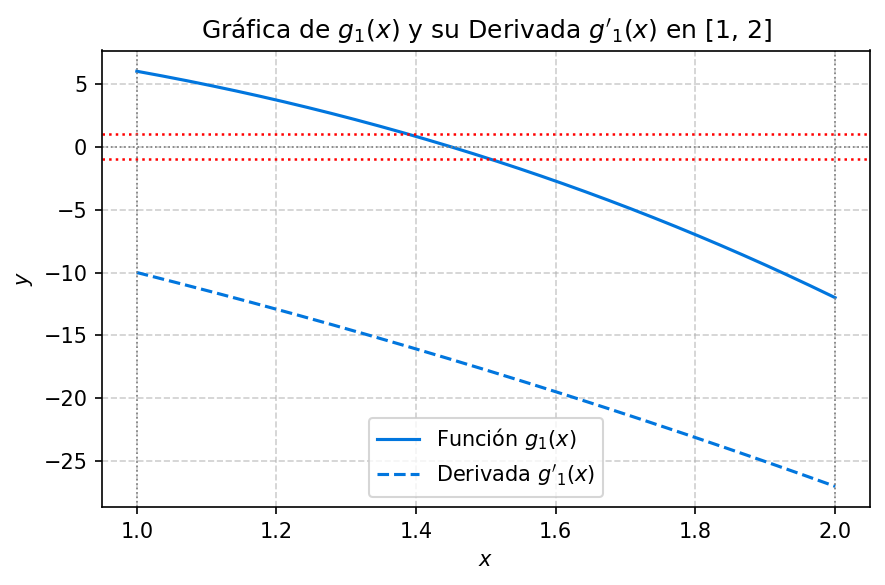

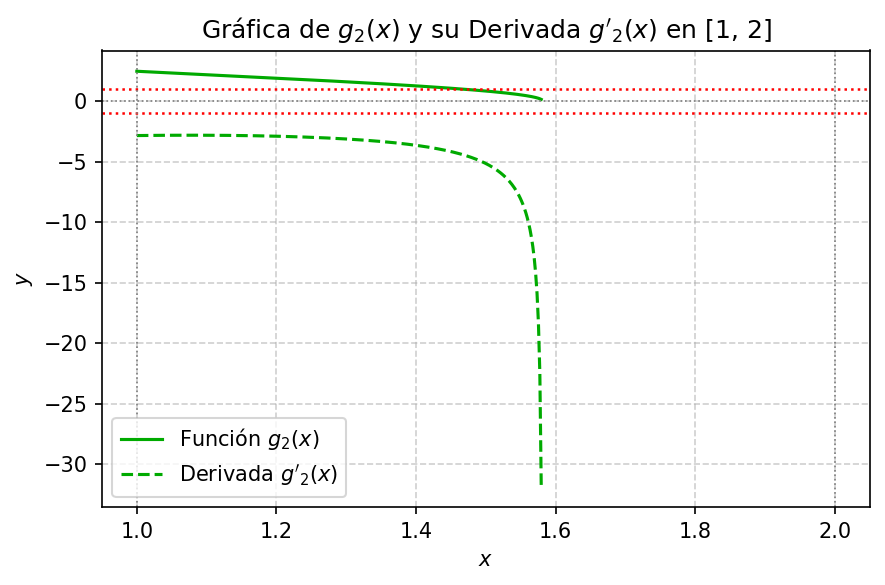

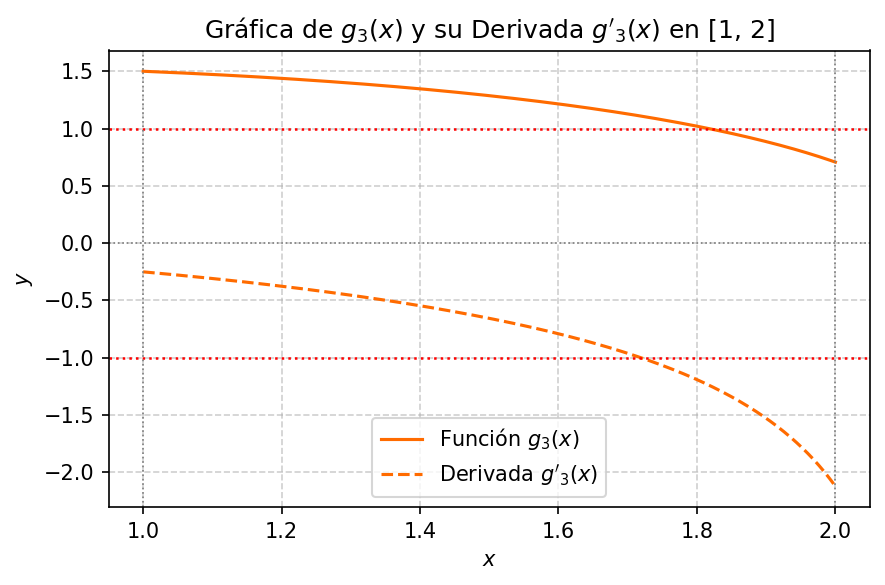

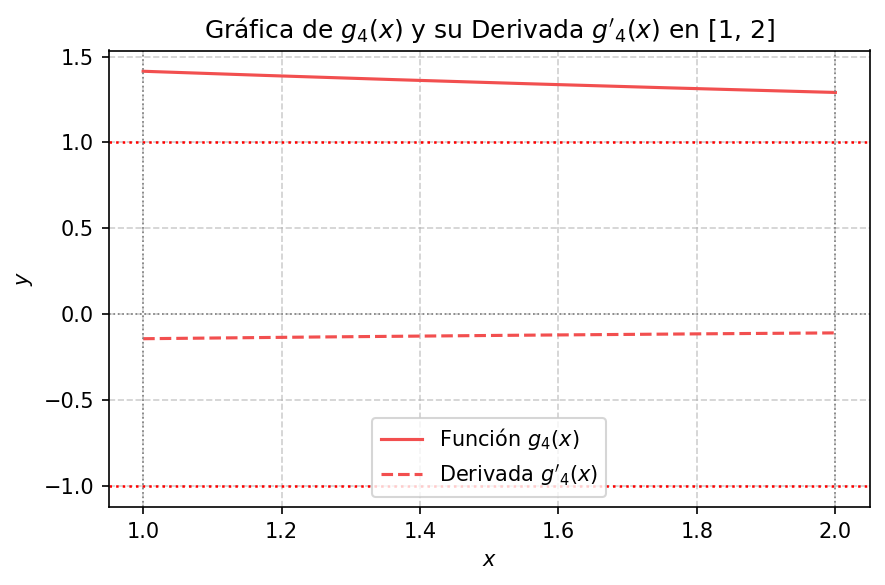

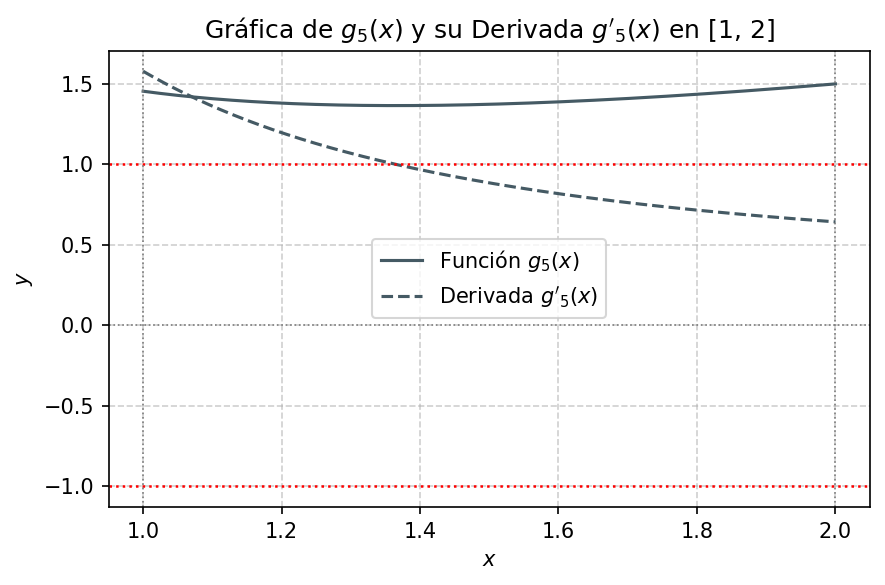

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Desactivar advertencias de NumPy para divisiones por cero o raíces de negativos
np.seterr(all='ignore') 

# ==============================================================================
# 1. Definición de Funciones g(x) y sus Derivadas g'(x)
# ==============================================================================

# Lista de funciones g(x)
g_fun = [
    lambda x: x - x**3 - 4*x**2 + 10,
    lambda x: np.sqrt(10/x - 4*x),
    lambda x: 0.5 * np.sqrt(10 - x**3),
    lambda x: np.sqrt(10 / (4 + x)),
    lambda x: x - (x**3 + 4*x**2 - 10) / (3*x**2 + 8*x)
]

# Lista de derivadas g'(x) - Calculadas a mano
g_prime_fun = [
    lambda x: 1 - 3*x**2 - 8*x, # g1'(x)
    lambda x: 0.5 / np.sqrt(10/x - 4*x) * (-10/x**2 - 4), # g2'(x)
    lambda x: 0.5 / (2 * np.sqrt(10 - x**3)) * (-3 * x**2), # g3'(x)
    lambda x: 0.5 / np.sqrt(10 / (4 + x)) * (-10 / (4 + x)**2), # g4'(x)
    
    # g5'(x) - Derivada de la fórmula de Newton-Raphson (f''f / (f')^2)
    lambda x: ((3*x**2 + 8*x) * (3*x**2 + 8*x) - (x**3 + 4*x**2 - 10) * (6*x + 8)) / (3*x**2 + 8*x)**2
]

# Nombres y estilos
colores = ['#0176DE', '#00AA00', '#FF6B00', '#F24F4F', '#455A64']
nombres = ['$g_1(x)$', '$g_2(x)$', '$g_3(x)$', '$g_4(x)$', '$g_5(x)$']
styles = ['-', '--'] 

# ==============================================================================
# 2. Setup Plotting Domain
# ==============================================================================
intervalo = [1.0, 2.0]
X = np.linspace(intervalo[0], intervalo[1], 500)

# ==============================================================================
# 3. Plotting Loop
# ==============================================================================
for i in range(len(g_fun)):
    
    # Calcular Y values
    Y_g = g_fun[i](X)
    Y_gp = g_prime_fun[i](X)
    
    # --- Robust Error Handling ---
    # 1. Check for complex numbers (result of sqrt of negative) and take the real part
    if np.iscomplexobj(Y_g): Y_g = Y_g.real
    if np.iscomplexobj(Y_gp): Y_gp = Y_gp.real

    # 2. Mask invalid values (NaN, Inf) which arise from domain errors (key to avoid crashes)
    Y_g = np.where(np.isfinite(Y_g), Y_g, np.nan)
    Y_gp = np.where(np.isfinite(Y_gp), Y_gp, np.nan)
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot g(x) and g'(x)
    ax.plot(X, Y_g, styles[0], color=colores[i], label=f'Función {nombres[i]}')
    ax.plot(X, Y_gp, styles[1], color=colores[i], label=f'Derivada $g\'_{i+1}(x)$')
    
    # Reference lines for convergence criteria (|g'(x)| < 1)
    ax.axhline(0, color='gray', linestyle=':', linewidth=0.8) 
    ax.axhline(1, color='red', linestyle=':', linewidth=1.2)   
    ax.axhline(-1, color='red', linestyle=':', linewidth=1.2)  
    ax.axvline(1, color='gray', linestyle=':', linewidth=0.8)
    ax.axvline(2, color='gray', linestyle=':', linewidth=0.8)
    
    # Labels and title
    ax.set_title(f'Gráfica de {nombres[i]} y su Derivada $g\'_{i+1}(x)$ en [1, 2]')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

# Revert NumPy error settings
np.seterr(all='warn')

In [48]:
def punto_fijo(g, p0, tol=1e-6, max_iter=50):
    p = p0
    for i in range(1, max_iter + 1):
        p_new = g(p)
        if np.abs(p_new - p) < tol:
            return p_new, i
        p = p_new
    return np.nan, max_iter

In [53]:
import pandas as pd
g_fun = [
    lambda x: x - x**3 - 4*x**2 + 10,
    lambda x: np.sqrt(abs(10/x - 4*x)),
    lambda x: 0.5 * np.sqrt(10 - x**3),
    lambda x: np.sqrt(10 / (4 + x)),
    lambda x: x - (x**3 + 4*x**2 - 10) / (3*x**2 + 8*x)
]

# Inicialización de parámetros
p0_inicial = 1.5
tolerancia = 1e-6
max_iteraciones = 50

resultados = []

# Iterar sobre todas las funciones
for i, g in enumerate(g_fun):
    nombre = f'g_{i+1}(x)'
    
    try:
        # 1. Intentar calcular el punto fijo
        raiz, iteraciones = punto_fijo(g, p0_inicial, tolerancia, max_iteraciones)
        
        # 2. Calcular el valor de f(x) = g(x) - x para la raíz encontrada
        # Usamos la función original f(x) = x^3 + 4x^2 - 10, que es la que se está resolviendo
        # (Nota: f(x) = 0 debe ser el resultado)
        f_x_minus_x = raiz**3 + 4*raiz**2 - 10 if not np.isnan(raiz) else np.nan
        
        estado = "Convergencia" if not np.isnan(raiz) else "No Converge"
        
        resultados.append({
            'Función': nombre,
            'Estado': estado,
            'Iteraciones': iteraciones if not np.isnan(raiz) else '>',
            'Raíz Aproximada': f'{raiz:.6f}' if not np.isnan(raiz) else 'N/A',
            '|g(x)-x| (Error Final)': f'{np.abs(f_x_minus_x):.2e}' if not np.isnan(raiz) else 'N/A'
        })
        
    except Exception as e:
        # Captura errores de dominio (ej. raíz de un negativo)
        resultados.append({
            'Función': nombre,
            'Estado': "Error de Dominio",
            'Iteraciones': 'N/A',
            'Raíz Aproximada': 'N/A',
            '|g(x)-x| (Error Final)': 'N/A'
        })

# Crear el DataFrame de Pandas para la tabla
df_resultados = pd.DataFrame(resultados)
df_resultados

,Función,Estado,Iteraciones,Raíz Aproximada,|g(x)-x| (Error Final)
0,g_1(x),Error de Dominio,N/A,N/A,N/A
1,g_2(x),No Converge,>,N/A,N/A
2,g_3(x),Convergencia,20,1.365230,3.68e-06
3,g_4(x),Convergencia,7,1.365230,1.18e-06
4,g_5(x),Convergencia,4,1.365230,0.00e+00


## Sistema de ecuaciones no lineales

\begin{align*}
3x_1 - \cos(x_1 x_2) - \frac{1}{2} & = 0 \\
x_1^{2} - 81(x_2+0.1)^{2} + \sin(x_3) + 1.06 & = 0 \\
\text{e}^{-x_1 x_2} + 20 x_3 + \frac{10\pi -3}{3} & = 0
\end{align*}

Para una primera iteracion de punto fijo proponemos:
\begin{align*}
g_1(x_1,x_2,x_3) & = \frac{\cos(x_1 x_2)}{3} + \frac{1}{6}\\
g_2(x_1,x_2,x_3) & = \frac{1}{9}\sqrt{x_1^{2} + \sin(x_3) + 1.06} - 0.1\\
g_3(x_1,x_2,x_3) & = -\frac{1}{20} \text{e}^{-x_1 x_2} - \frac{10\pi -3}{60}
\end{align*}

In [10]:
from numpy import cos, sin, exp, pi, sqrt
import numpy as np
def F(x):
    f1 = 3*x[0] - cos(x[1]*x[2]) - 0.5 
    f2 = x[0]**2 - 81*(x[1]+0.1)**2 + sin(x[2]) + 1.06
    f3 = exp(-x[0]*x[1]) + 20*x[2] + (10*pi-3)/3
    return np.array([f1,f2,f3])

## punto fijo

In [11]:
def G(x):
    g1 =  (cos(x[1]*x[2]) + 0.5)/3 
    g2 = sqrt(x[0]**2+sin(x[2])+1.06)/9 - 0.1
    g3 = -(exp(-x[0]*x[1])  + (10*pi-3)/3)/20
    return np.array([g1,g2,g3])

In [12]:
MAX_ITER = 5
x = np.array([0.1,0.1,-0.1])
print( "  x0:", x)
print( "  G(x0):", G(x))
print( "  F(x0):", F(x))
for k  in range(1,MAX_ITER+1):
    x = G(x)
    print( "* iteracion ", k)
    print( "  x:", x)
    print( "  G(x):", G(x))
    print( "  F(x):", F(x))
    print("")

  x0: [ 0.1  0.1 -0.1]
  G(x0): [ 0.49998333  0.00944115 -0.52310127]
  F(x0): [-1.19995    -2.26983342  8.46202535]
* iteracion  1
  x: [ 0.49998333  0.00944115 -0.52310127]
  G(x): [ 4.99995935e-01  2.55677468e-05 -5.23363311e-01]
  F(x): [-3.78043413e-05 -1.59752333e-01  5.24087246e-03]

* iteracion  2
  x: [ 4.99995935e-01  2.55677468e-05 -5.23363311e-01]
  G(x): [ 5.00000000e-01  1.23367204e-05 -5.23598136e-01]
  F(x): [-1.21951525e-05 -2.14383250e-04  4.69651010e-03]

* iteracion  3
  x: [ 5.00000000e-01  1.23367204e-05 -5.23598136e-01]
  G(x): [ 5.00000000e-01  3.41679063e-08 -5.23598467e-01]
  F(x): [-6.86659618e-11 -1.99313677e-04  6.61534658e-06]

* iteracion  4
  x: [ 5.00000000e-01  3.41679063e-08 -5.23598467e-01]
  G(x): [ 5.00000000e-01  1.64870404e-08 -5.23598775e-01]
  F(x): [-2.08623119e-11 -2.86430100e-07  6.15125720e-06]

* iteracion  5
  x: [ 5.00000000e-01  1.64870404e-08 -5.23598775e-01]
  G(x): [ 5.00000000e-01  4.56640004e-11 -5.23598775e-01]
  F(x): [ 0.0000000

## Newton-Raphson
Aplicamos el m\'etodo de Newton. Calculamos una expresion de la matriz Jacobiana.

In [13]:
def JF(x):
    f11 = 3
    f12 = x[2]*sin(x[1]*x[2])
    f13 = x[1]*sin(x[1]*x[2])
    f21 = 2*x[0]
    f22 = -162*(x[1]+0.1)
    f23 = cos(x[2])
    f31 = x[1]*exp(-x[0]*x[1])
    f32 = -x[0]*exp(-x[0]*x[1])
    f33 = 20
    return np.array([[f11,f12,f13],[f21,f22,f23],[f31,f32,f33]])

In [14]:
MAX_ITER = 5
x = np.array([0.1,0.1,-0.1])
print( "  x0:", x)
print( "  F(x0):", F(x))
for k  in range(1,MAX_ITER+1):
    x = x - np.linalg.solve(JF(x),F(x))
    print( "* iteracion ", k)
    print( "  x:", x)
    print( "  F(x):", F(x))
    print("")
    


  x0: [ 0.1  0.1 -0.1]
  F(x0): [-1.19995    -2.26983342  8.46202535]
* iteracion  1
  x: [ 0.49986839  0.01934524 -0.52547998]
  F(x): [-3.43150416e-04 -3.45466144e-01 -4.72474915e-02]

* iteracion  2
  x: [ 0.50001455  0.00157042 -0.52355772]
  F(x): [ 4.39950501e-05 -2.55905343e-02  3.61788001e-05]

* iteracion  3
  x: [ 5.00000111e-01  1.21640748e-05 -5.23598455e-01]
  F(x): [ 3.32744223e-07 -1.96681603e-04  3.26217210e-07]

* iteracion  4
  x: [ 5.00000000e-01  7.41191951e-10 -5.23598776e-01]
  F(x): [ 2.02802219e-11 -1.19836432e-08  1.98419059e-11]

* iteracion  5
  x: [ 5.00000000e-01 -1.97114710e-18 -5.23598776e-01]
  F(x): [-2.22044605e-16 -2.22044605e-16 -1.77635684e-15]



In [86]:
def Newton(F, JF, x0, tol=1e-8, Maxiter=20):
    x = x0.copy()
    k = 1
    xlist = [x]
    while k <= Maxiter:
        xnew = x - np.linalg.solve(JF(x), F(x))
        xlist += [xnew]
        if np.linalg.norm(F(xnew))<tol: return xnew, xlist
        k += 1
        x = xnew.copy()
    print("se excedio el numero maximo de iteraciones")
    return xnew, xlist

In [88]:
x0 = np.array([0.1,0.1,-0.1])
x, xlist = Newton(F, JF, x0, tol=1e-8, Maxiter=20)
print(x)

[ 5.00000000e-01  3.35521889e-18 -5.23598776e-01]


## Convergencia Acelerada.

1.  Aceleracion de Aitken para una sucesion que converge linealmente.
    $$
\hat{p}_n = p_{n} - \frac{(p_{n+1}-p_{n})^{2}}{p_{n+2}-2p_{n+1} + p_{n}}
    $$
    **Ejemplo:** $$p_{n} = \cos(1/n), \quad \text{converge linealmente a } p =1$$

In [30]:
p = lambda n: np.cos(1/n)

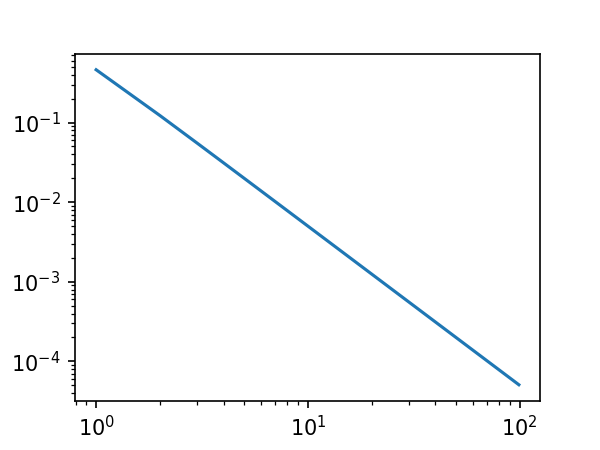

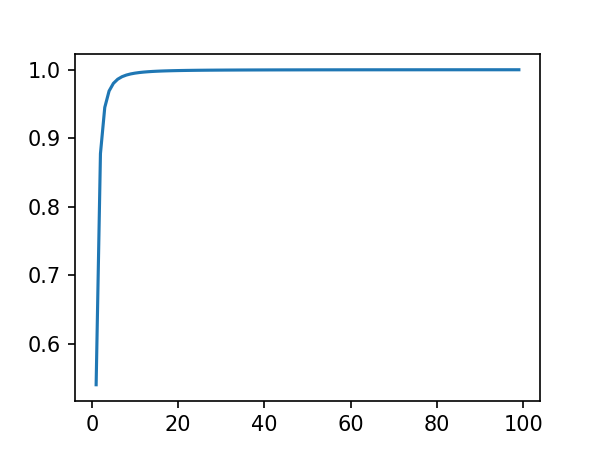

In [36]:
nplot = np.arange(1,100)
pn = p(nplot)
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(nplot,pn)
fig, ax = plt.subplots(figsize=(4, 3))
ax.loglog(nplot,np.abs(p(nplot)-1.0))
plt.show()

In [37]:
def aitken(pn):
    n = pn.size
    phat = np.zeros(n-2)
    for i in range(n-2):
        phat[i] = pn[i] - (pn[i+1]-pn[i])**2/(pn[i+2]-2*pn[i+1]+pn[i])
    return phat
phat = aitken(p(nplot))

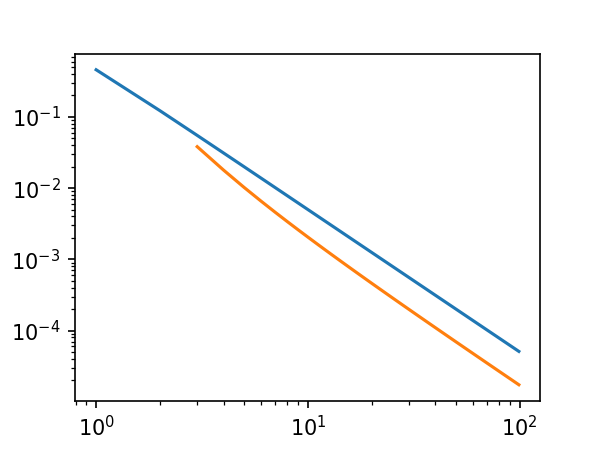

In [38]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.loglog(nplot,np.abs(p(nplot)-1.0))
ax.loglog(nplot[2:],np.abs(phat-1.0))

plt.show()

In [42]:
df = pd.DataFrame({'n':nplot[:7], 'pn':pn[:7], 'phat':phat[:7]})
df

,n,pn,phat
0,1,0.540302,0.961775
1,2,0.877583,0.982129
2,3,0.944957,0.989786
3,4,0.968912,0.993416
4,5,0.980067,0.995410
5,6,0.986143,0.996620
6,7,0.989813,0.997408


**Ejemplo:** Resolver $$x^{3} - 4x^{2} - 10 = 0 \quad \iff \quad g(x) = \left(\frac{10}{x+4}\right)^{1/2}$$

In [45]:
g = lambda x: np.sqrt(10.0/(x+4))
# k = 0
p00 = 1.5
p10 = g(p00)
p20 = g(p10)
# k = 1
p01 = p00 - (p10-p00)**2/(p20-2*p10+p00)
p11 = g(p01)
p21 = g(p11)
# k = 2
p02 = p01 - (p11-p01)**2/(p21-2*p11+p01)
p12 = g(p02)
p22 = g(p12)
print(p22)

1.365230013414137


In [59]:
def steffensen(g,p_0, MAXITER=10):
    p0 = p_0
    pall  = [p0]
    for i in range(MAXITER):
        p1 = g(p0)
        p2 = g(p1)
        p0 = p0 - (p1-p0)**2/(p2-2*p1+p0)
        pall += [p1] + [p2] + [p0]
    return p0, pall
def fixedpoint(f, p_0, MAXITER=10):
    p = p_0
    pall = [p]
    for i in range(MAXITER):
        p = g(p)
        pall += [p]
    return p, pall

In [60]:
p, pall = steffensen(g, p00, MAXITER=2)
print(p)
print(pall)

1.3652300134165856
[1.5, 1.348399724926484, 1.3673763719912828, 1.3652652239572602, 1.3652255336197925, 1.3652305833760046, 1.3652300134165856]


## Metodo de Broyden

In [69]:
from numpy import cos, sin, exp, pi, sqrt
import numpy as np
def F(x):
    f1 = 3*x[0] - cos(x[1]*x[2]) - 0.5 
    f2 = x[0]**2 - 81*(x[1]+0.1)**2 + sin(x[2]) + 1.06
    f3 = exp(-x[0]*x[1]) + 20*x[2] + (10*pi-3)/3
    return np.array([f1,f2,f3])
def JF(x):
    f11 = 3
    f12 = x[2]*sin(x[1]*x[2])
    f13 = x[1]*sin(x[1]*x[2])
    f21 = 2.0*x[0]
    f22 = -162.0*(x[1]+0.1)
    f23 = cos(x[2])
    f31 = -x[1]*exp(-x[0]*x[1])
    f32 = -x[0]*exp(-x[0]*x[1])
    f33 = 20.0
    return np.array([[f11,f12,f13],[f21,f22,f23],[f31,f32,f33]])
x0 = np.array([0.1,0.1,-0.1])
print( "  x0:", x0)
print( "  F(x0):", F(x0))
A0 = JF(x0)
A0inv = np.linalg.inv(A0)
# print(A0inv)
x1 = x0 - A0inv@F(x0)
# x1 = x0 - np.linalg.solve(A0,F(x0))
print("  x1:", x1)
print("  F(x1):", F(x1))
#
y1 = F(x1)-F(x0)
s1 = x1-x0
A1inv = np.linalg.inv(A0) + ( np.outer((s1-A0inv@y1), A0inv.T@s1))/(s1.dot(A0inv@y1))
print(A1inv)
x2 = x1 - A1inv@F(x1)
print(x2)
# for k  in range(1,MAX_ITER+1):
#     x = x - np.linalg.solve(JF(x),F(x))
#     print( "* iteracion ", k)
#     print( "  x:", x)
#     print( "  F(x):", F(x))
#     print("")
    

  x0: [ 0.1  0.1 -0.1]
  F(x0): [-1.19995    -2.26983342  8.46202535]
  x1: [ 0.49986967  0.01946685 -0.52152047]
  F(x1): [-3.39446456e-04 -3.44387928e-01  3.18823779e-02]
[[ 3.33378100e-01  1.11049659e-05  8.96734389e-06]
 [-2.02070982e-03 -3.09484821e-02  2.19681582e-03]
 [ 1.02389942e-03 -1.65038427e-04  5.01095867e-02]]
[ 0.49998638  0.00873784 -0.52317457]


In [77]:
def Broyden(F, JFx0, x0, tol, Maxiter):
    A0inv = np.linalg.inv(JFx0)
    xsol = [x0]
    x1 = x0 - A0inv@F(x0)
    xsol += [x1]
    k = 2
    while k <=Maxiter:
        y1 = F(x1)-F(x0)
        s1 = x1-x0
        print(y1, s1)
        A1inv = A0inv + ( np.outer((s1-A0inv@y1), A0inv.T@s1))/(s1.dot(A0inv@y1))
        xnew = x1 - A1inv@F(x1)
        xsol += [xnew]
        if np.linalg.norm(F(xnew))<tol: return x1, xsol
        k += 1
        x0 = x1.copy()
        x1 = xnew.copy()
        A0inv = A1inv.copy()
    print("se excedio el numero maximo de iteraciones")
    return x1, xsol
        
    

In [90]:
x0 = np.array([0.1,0.1,-0.1])
xB, xlistB = Broyden(F, JF(x0), x0, tol=1e-8, Maxiter=20)
print(x, F(x))

[ 1.19961055  1.92544549 -8.43014297] [ 0.39986967 -0.08053315 -0.42152047]
[ 0.00030902  0.19700438 -0.02775763] [ 0.0001167  -0.01072901 -0.0016541 ]
[ 5.03190027e-05  1.33302277e-01 -4.02961895e-03] [ 2.02216031e-05 -7.87056574e-03 -3.97767087e-04]
[-1.89079076e-05  1.34420552e-02 -9.30933140e-05] [-6.26834243e-06 -8.27745280e-04 -2.53438924e-05]
[-9.81666181e-07  6.36082693e-04 -2.02643961e-06] [-3.27150668e-07 -3.93347313e-05 -1.08468115e-06]
[ 5.00000000e-01  3.35521889e-18 -5.23598776e-01] [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]


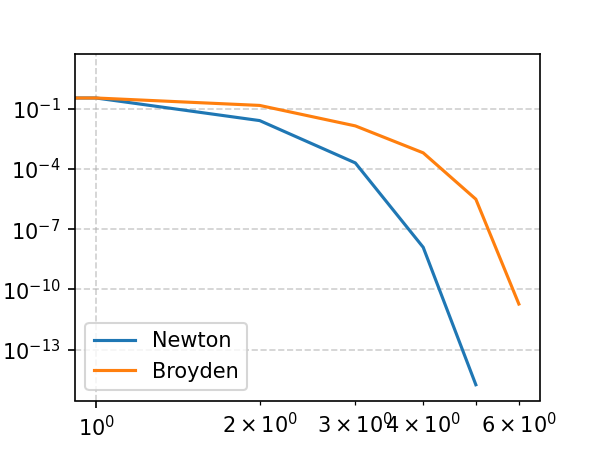

In [97]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.loglog(np.arange(len(xlist)), [np.linalg.norm(F(x)) for x in xlist], label='Newton')
ax.loglog(np.arange(len(xlistB)), [np.linalg.norm(F(x)) for x in xlistB], label='Broyden')
ax.legend(loc='best')
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [98]:
import numpy as np
A = np.array([[0,0,-1],[0,0,1],[-1,1,0]])
np.linalg.eig(A)

(array([-1.41421356e+00,  9.77950360e-17,  1.41421356e+00]),
 array([[ 5.00000000e-01, -7.07106781e-01, -5.00000000e-01],
        [-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
        [ 7.07106781e-01,  9.06753788e-17,  7.07106781e-01]]))